<a href="https://colab.research.google.com/github/mevangelista-alvarado/Python_Notas/blob/master/Intro_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

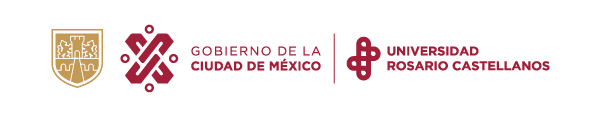

**Actualizado:** Septiembre de 2023

**Autor:** Miguel Evangelista ([@mevagelista-alvarado](https://github.com/mevangelista-alvarado))

## Módulo `Pandas`

Pandas es una librería de código abierto utilizada dentro del ámbito de Data Science y Machine Learning, ya que ofrece unas estructuras muy poderosas y flexibles que facilitan la manipulación y tratamiento de datos.






Pandas surgió como necesidad de aunar en una única librería todo lo necesario para que un analista de datos pudiese tener en una misma herramienta todas las funcionalidades que necesitaba en su día a día, como son: cargar datos, modelar, analizar, manipular y prepararlos.



El nombre _Pandas_ es en realidad una contracción del término _Panel Data_



Su principal desarrollador, Wes McKinney, empezó a desarrollar Pandas en el año 2008 mientras trabajaba en AQR Capital

La estructura y algunas ideas de este material se tomaron del siguiente tutorial: https://pandas.pydata.org/docs/user_guide/10min.html

Importamos el módulo de la siguiente manera:

In [2]:
import numpy as np
import pandas as pd

## Estructuras de datos básicas en pandas


Pandas proporciona dos tipos de clases para manejar datos:

__Series__: una matriz etiquetada unidimensional que contiene datos de cualquier tipo como números enteros, cadenas, objetos Python, etc.

__DataFrame__: una estructura de datos bidimensional que contiene datos como una matriz bidimensional o una tabla con filas y columnas.

## Creación de objetos

Crear __Series__ pasando una lista de valores, permitiendo que pandas cree un valor predeterminado `RangeIndex`.



In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Crear DataFramepasando una matriz NumPy con un índice de fecha y hora usando date_range() columnas etiquetadas:



In [4]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

Documentacion de la funcion `date_range` se puede consultar https://pandas.pydata.org/docs/reference/api/pandas.date_range.html


In [10]:
_dates = pd.date_range("20130101", periods=6, freq="W")
_dates

DatetimeIndex(['2013-01-06', '2013-01-13', '2013-01-20', '2013-01-27',
               '2013-02-03', '2013-02-10'],
              dtype='datetime64[ns]', freq='W-SUN')

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.953658,0.670859,0.192054,0.158108
2013-01-02,-1.460743,-0.249453,-1.167611,1.755230
2013-01-03,-2.105847,2.136208,1.055723,-1.505380
2013-01-04,-0.729794,2.202655,0.103557,-1.654403
2013-01-05,0.595191,-0.732766,-0.079162,1.152190
2013-01-06,-0.251028,1.283608,-2.175653,-0.838984


Crear __DataFrame__ pasando un diccionario de objetos donde las claves son las etiquetas de las columnas y los valores son los valores de las columnas.

In [6]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Las columnas del resultado __DataFrame__ tienen diferentes tipos :



In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Explorando datos

Utilice `DataFrame.head()` y `DataFrame.tail()` para ver las filas superior e inferior del marco respectivamente:

In [11]:
df.head()

,A,B,C,D
2013-01-01,0.953658,0.670859,0.192054,0.158108
2013-01-02,-1.460743,-0.249453,-1.167611,1.755230
2013-01-03,-2.105847,2.136208,1.055723,-1.505380
2013-01-04,-0.729794,2.202655,0.103557,-1.654403
2013-01-05,0.595191,-0.732766,-0.079162,1.152190


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.729794,2.202655,0.103557,-1.654403
2013-01-05,0.595191,-0.732766,-0.079162,1.152190
2013-01-06,-0.251028,1.283608,-2.175653,-0.838984


Mostrar el `DataFrame.index` o `DataFrame.columns`:

In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

`describe()` muestra un resumen estadístico rápido de sus datos:

In [15]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.499760,0.885185,-0.345182,-0.155540
std,1.177211,1.217426,1.144579,1.413883
min,-2.105847,-0.732766,-2.175653,-1.654403
25%,-1.278006,-0.019375,-0.895499,-1.338781
50%,-0.490411,0.977233,0.012198,-0.340438
75%,0.383636,1.923058,0.169930,0.903669
max,0.953658,2.202655,1.055723,1.755230


Transponiendo sus datos:

In [ ]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.440004,-1.164274,0.797839,0.171011,-0.233391,-0.607191
B,0.724271,-0.939396,-1.610534,0.212988,0.876765,0.879398
C,-1.962698,0.167145,-0.633296,-0.137100,-0.265256,-1.037044
D,1.340184,-1.310957,-1.716498,0.836130,-0.150637,0.461933


`DataFrame.sort_index()` ordena por un eje:

In [ ]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.340184,-1.962698,0.724271,-0.440004
2013-01-02,-1.310957,0.167145,-0.939396,-1.164274
2013-01-03,-1.716498,-0.633296,-1.610534,0.797839
2013-01-04,0.836130,-0.137100,0.212988,0.171011
2013-01-05,-0.150637,-0.265256,0.876765,-0.233391
2013-01-06,0.461933,-1.037044,0.879398,-0.607191


`DataFrame.sort_values()` ordena por valores:

In [ ]:
df.sort_values(by="B")

,A,B,C,D
2013-01-03,0.797839,-1.610534,-0.633296,-1.716498
2013-01-02,-1.164274,-0.939396,0.167145,-1.310957
2013-01-04,0.171011,0.212988,-0.137100,0.836130
2013-01-01,-0.440004,0.724271,-1.962698,1.340184
2013-01-05,-0.233391,0.876765,-0.265256,-0.150637
2013-01-06,-0.607191,0.879398,-1.037044,0.461933


## Selección

Para un `DataFrame`, al pasar una sola etiqueta se selecciona una columna y se obtiene un `Series` equivalente a df.A:

In [ ]:
df["A"]

2013-01-01   -0.440004
2013-01-02   -1.164274
2013-01-03    0.797839
2013-01-04    0.171011
2013-01-05   -0.233391
2013-01-06   -0.607191
Freq: D, Name: A, dtype: float64

Para un `DataFrame`, al usar `:` se seleccionan filas coincidentes:

In [ ]:
df[0:3]

,A,B,C,D
2013-01-01,-0.440004,0.724271,-1.962698,1.340184
2013-01-02,-1.164274,-0.939396,0.167145,-1.310957
2013-01-03,0.797839,-1.610534,-0.633296,-1.716498


In [ ]:
df["20130102":"20130103"]

,A,B,C,D
2013-01-02,-1.164274,-0.939396,0.167145,-1.310957
2013-01-03,0.797839,-1.610534,-0.633296,-1.716498


## Selección por etiqueta

Seleccionar una fila que coincida con una etiqueta:

In [ ]:
label = dates[0]
label

Timestamp('2013-01-01 00:00:00', freq='D')

In [ ]:
df.loc[dates[0]]

A   -0.440004
B    0.724271
C   -1.962698
D    1.340184
Name: 2013-01-01 00:00:00, dtype: float64

Seleccionar todas las filas `:` con etiquetas de columna seleccionadas:

In [ ]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.440004,0.724271
2013-01-02,-1.164274,-0.939396
2013-01-03,0.797839,-1.610534
2013-01-04,0.171011,0.212988
2013-01-05,-0.233391,0.876765
2013-01-06,-0.607191,0.879398


Para el corte de etiquetas, se incluyen ambos puntos finales :

In [ ]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-1.164274,-0.939396
2013-01-03,0.797839,-1.610534
2013-01-04,0.171011,0.212988


Al seleccionar una sola etiqueta de fila y columna se devuelve un escalar:

In [ ]:
df.loc[dates[0], "A"]

-0.44000363439818696

equivalente al método anterior

In [ ]:
df.at[dates[0], "A"]

-0.44000363439818696

**OBS.**  

Los sectores enteros actúan de manera similar a NumPy/Python.

In [ ]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.171011,0.212988
2013-01-05,-0.233391,0.876765


In [ ]:
df.iloc[3:5, :]

,A,B,C,D
2013-01-04,0.171011,0.212988,-0.137100,0.836130
2013-01-05,-0.233391,0.876765,-0.265256,-0.150637


In [ ]:
df.iloc[:, 0:2]

,A,B
2013-01-01,-0.440004,0.724271
2013-01-02,-1.164274,-0.939396
2013-01-03,0.797839,-1.610534
2013-01-04,0.171011,0.212988
2013-01-05,-0.233391,0.876765
2013-01-06,-0.607191,0.879398


## Indexación booleana

Seleccione filas donde `df.A` sea mayor que `0`.

In [ ]:
df[df["A"] > 0]

,A,B,C,D
2013-01-03,0.797839,-1.610534,-0.633296,-1.716498
2013-01-04,0.171011,0.212988,-0.137100,0.836130


Seleccionar valores de `DataFrame` donde se cumple una condición booleana:

In [ ]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.724271,NaN,1.340184
2013-01-02,NaN,NaN,0.167145,NaN
2013-01-03,0.797839,NaN,NaN,NaN
2013-01-04,0.171011,0.212988,NaN,0.836130
2013-01-05,NaN,0.876765,NaN,NaN
2013-01-06,NaN,0.879398,NaN,0.461933


### Método de uso `isin()` para filtrar:

In [23]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,0.953658,0.670859,0.192054,0.158108,one
2013-01-02,-1.460743,-0.249453,-1.167611,1.755230,one
2013-01-03,-2.105847,2.136208,1.055723,-1.505380,two
2013-01-04,-0.729794,2.202655,0.103557,-1.654403,three
2013-01-05,0.595191,-0.732766,-0.079162,1.152190,four
2013-01-06,-0.251028,1.283608,-2.175653,-0.838984,three


In [24]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-2.105847,2.136208,1.055723,-1.50538,two
2013-01-05,0.595191,-0.732766,-0.079162,1.15219,four


In [25]:
df2[~df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-01,0.953658,0.670859,0.192054,0.158108,one
2013-01-02,-1.460743,-0.249453,-1.167611,1.755230,one
2013-01-04,-0.729794,2.202655,0.103557,-1.654403,three
2013-01-06,-0.251028,1.283608,-2.175653,-0.838984,three


## Operaciones

Calcule el valor medio para cada columna:

In [ ]:
df.mean()

A   -0.246002
B    0.023915
C   -0.644708
D   -0.089974
dtype: float64

Calcule el valor medio para cada fila:

In [ ]:
df.mean(axis=1)

2013-01-01   -0.084561
2013-01-02   -0.811870
2013-01-03   -0.790622
2013-01-04    0.270757
2013-01-05    0.056870
2013-01-06   -0.075726
Freq: D, dtype: float64

In [ ]:
df.std()

A    0.674534
B    1.056867
C    0.768363
D    1.212244
dtype: float64

In [ ]:
df.min()

A   -1.164274
B   -1.610534
C   -1.962698
D   -1.716498
dtype: float64

In [ ]:
df.max(axis=1)

2013-01-01    1.340184
2013-01-02    0.167145
2013-01-03    0.797839
2013-01-04    0.836130
2013-01-05    0.876765
2013-01-06    0.879398
Freq: D, dtype: float64

## Funciones definidas por el usuario

`DataFrame.agg()` y `DataFrame.transform()` aplica una función definida por el usuario que reduce o transmite su resultado respectivamente.

In [27]:
df.agg(lambda x: np.mean(x) * 0.5)

A   -0.249880
B    0.442593
C   -0.172591
D   -0.077770
dtype: float64

In [28]:
df.agg(lambda x: np.mean(x) * 0.5, axis=1)

2013-01-01    0.246835
2013-01-02   -0.140322
2013-01-03   -0.052412
2013-01-04   -0.009748
2013-01-05    0.116932
2013-01-06   -0.247757
Freq: D, dtype: float64

In [26]:
df.transform(lambda x: x * 100)

,A,B,C,D
2013-01-01,95.365835,67.085904,19.205427,15.810779
2013-01-02,-146.074261,-24.945257,-116.761086,175.522953
2013-01-03,-210.584675,213.620774,105.572259,-150.537990
2013-01-04,-72.979447,220.265468,10.355747,-165.440302
2013-01-05,59.519103,-73.276634,-7.916189,115.218999
2013-01-06,-25.102832,128.360777,-217.565324,-83.898418


## Importar y exportar datos

Escribir en un archivo csv:

In [ ]:
df.to_csv("foo.csv")

In [ ]:
df

,A,B,C,D
2013-01-01,0.790742,-0.162690,2.377326,1.242756
2013-01-02,-0.798553,-0.282975,0.872251,0.762411
2013-01-03,-1.185886,-1.100262,-0.575781,-2.074336
2013-01-04,-0.083348,2.169085,1.019117,1.275993
2013-01-05,0.045894,0.822301,-1.379060,-0.832769
2013-01-06,1.467582,-0.329569,1.210551,0.182121


Lectura de un archivo csv:

In [ ]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2013-01-01,0.790742,-0.162690,2.377326,1.242756
1,2013-01-02,-0.798553,-0.282975,0.872251,0.762411
2,2013-01-03,-1.185886,-1.100262,-0.575781,-2.074336
3,2013-01-04,-0.083348,2.169085,1.019117,1.275993
4,2013-01-05,0.045894,0.822301,-1.379060,-0.832769
5,2013-01-06,1.467582,-0.329569,1.210551,0.182121


Lectura y escritura en Excel.

In [ ]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [ ]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=0)

,A,B,C,D
2013-01-01,0.790742,-0.162690,2.377326,1.242756
2013-01-02,-0.798553,-0.282975,0.872251,0.762411
2013-01-03,-1.185886,-1.100262,-0.575781,-2.074336
2013-01-04,-0.083348,2.169085,1.019117,1.275993
2013-01-05,0.045894,0.822301,-1.379060,-0.832769
2013-01-06,1.467582,-0.329569,1.210551,0.182121


## Plotting

Usamos la convención estándar para hacer referencia a la API matplotlib

In [ ]:
import matplotlib.pyplot as plt


Plot solo una columna

<Axes: >

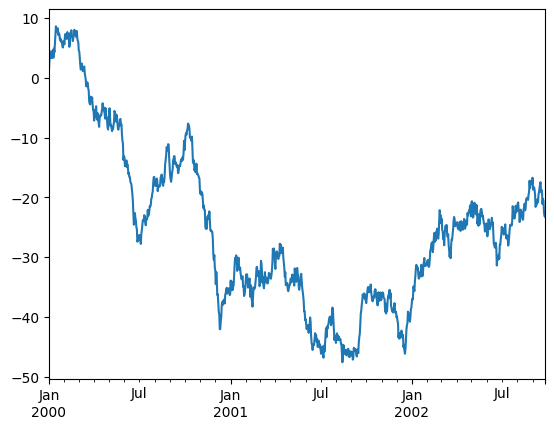

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

`Plot` todas las columnas:

<Figure size 640x480 with 0 Axes>

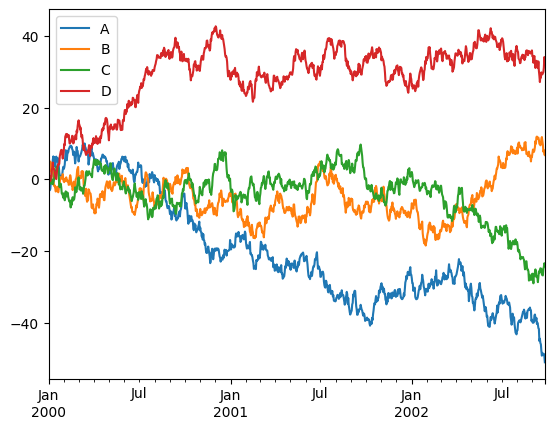

In [ ]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()

plt.figure();
df.plot();
plt.legend(loc='best');

`df.cumsum()` devuelve la suma acumulada sobre el eje del `DataFrame`.